In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import re 

%matplotlib inline


In [ ]:
# class Pixel: 
#     def __init__(self, B,G,R,A):
#         self.B = B
#         self.G = G
#         self.R = R
#         self.A = A
#     def __repr__(self) -> str:
#         return f"{type(self).__name__}(B={self.B}, G={self.G},R={self.R},A={self.A})"

In [ ]:
#read in log file 
notepad = 'testMLplugin_debug.log'
with open(notepad) as f:
    f = f.readlines()




In [ ]:
# Define the regex pattern to capture each line's pixel values, then make pixel obj 
pattern = r'CURR: (\d+), Row: (\d+), Column: (\d+), B: (-?[\d.]+(?:[eE][-+]?\d+)?), G: (-?[\d.]+(?:[eE][-+]?\d+)?), R: (-?[\d.]+(?:[eE][-+]?\d+)?), A: (-?[\d.]+(?:[eE][-+]?\d+)?)'

#Define couple of storing things;
frames_data = {} # dict with key --> value as frame_num --> 2d array of frame's pixels
pixels_array = [] #2d list
row_data = [] #1d list, holds specific row of pixels
counter = 0
curr_row_num = -10
curr_frame = -10

row_counter = 0
for x in f:
    # print(x)
    
    matches = re.findall(pattern, x)
    if len(matches) == 0: #if there were no matches, print; and hopefully it'll just be an empty line, and not a line that regex missed
        print(x)
        continue

    matches = matches[0]
    if curr_frame == -10:
        curr_frame = int(matches[0])
    if curr_row_num == -10:
        curr_row_num = int(matches[1])

#Checks if row is changed; if yes, append and reset row_data
    if curr_row_num != int(matches[1]):
        curr_row_num = int(matches[1])
        pixels_array.append(row_data) 
        row_counter+=1

        row_data = []
        
    #If frame changes; we've parsed through all data; store data then reset array
    if curr_frame != int(matches[0]):
        print(f"Finished parsing through {curr_frame}'s data")
        print(f"Now parsing {matches[0]}'s data")

        frames_data[curr_frame] = pixels_array
        curr_frame = int(matches[0])
        row_counter = 0 
        counter = 0

        pixels_array = []


    # pixel = Pixel(B = float(matches[3]), G = float(matches[4]), R = float(matches[5]), A = float(matches[6]))
    
    #puts in tuple for RGB
    pixel = (float(matches[5]),float(matches[4]),float(matches[3]), float(matches[6])) 

    row_data.append(pixel)
    # print(f'row data: {row_data}')







In [ ]:
for x in frames_data:
    print(x)

In [ ]:
# frames_data[726]

In [ ]:
height = len(frames_data[726])
width = len(frames_data[726][0])
print(height,width)

In [ ]:
from PIL import Image
import numpy as np

height = len(frames_data[1482])
width = len(frames_data[1482][0])

pixels = frames_data[1482] #2d array of tuples that include RGBA values
# Image.new(mode = 'RGBA', size = (width,height) )

pixels = np.array(pixels)  # Convert to numpy array if not already
min_val = pixels.min()
max_val = pixels.max()
normalized_pixels = (pixels - min_val) / (max_val - min_val) * 255

# Convert to uint8
array = normalized_pixels.astype(np.uint8)

# Ensure the array shape and dtype is correct
height, width, _ = array.shape


# Use PIL to create an image from the new array of pixels
new_image = Image.fromarray(array)
new_image.save('new.png')


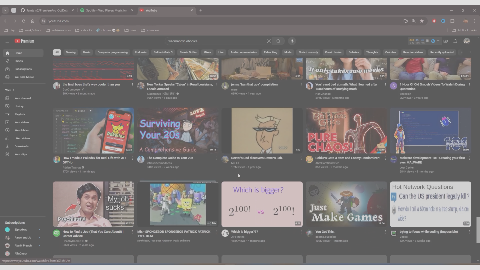

In [8]:
new_image

In [ ]:
pixel_data = frames_data[726]
pixel_data